# Iris Classification Comparision

In [207]:
import seaborn
import pandas as pd
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import datasets
import numpy as np

In [591]:
irisData = seaborn.load_dataset("iris")


In [592]:
irisData.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [593]:
irisData.shape

(150, 5)

In [594]:
irisData.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [595]:
X = irisData.drop(['species'], axis=1)
y = irisData[['species']]
y = y.values[:,0]

In [596]:
set_prop = 0.2

#  Initialize seed parameter for the random number generator used for the split
seed = 7

# Split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=set_prop, random_state=seed)

# Knn Classifier

In [597]:
import math 
sqrtLength = math.sqrt(len(X_train))
sqrtLength = round(sqrtLength)

In [598]:
success_rate = []
for i in range(3,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    success_rate.append(accuracy_score(y_test, pred_i))

In [601]:
print(success_rate)
success_rate.index(max(success_rate))+3

[0.9, 0.9333333333333333, 0.9, 0.8666666666666667, 0.8666666666666667, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9333333333333333, 0.9, 0.9, 0.9, 0.9, 0.9, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8333333333333334, 0.8333333333333334, 0.8, 0.8, 0.8333333333333334, 0.9, 0.9, 0.8333333333333334, 0.8666666666666667, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334]


4

In [600]:
print(max(success_rate))


0.9333333333333333


In [217]:
knn = KNeighborsClassifier(n_neighbors=4)

In [218]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [219]:
predict_y = knn.predict(X_test)
accuracy = accuracy_score(y_test, predict_y)
print(accuracy)

0.9333333333333333


In [220]:
predict_y

array(['virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'setosa',
       'versicolor', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica'],
      dtype=object)

In [221]:
cnf_matrix = confusion_matrix(y_test, predict_y)

In [222]:
cnf_matrix

array([[ 7,  0,  0],
       [ 0, 12,  0],
       [ 0,  2,  9]], dtype=int64)

In [223]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.86      1.00      0.92        12
   virginica       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [224]:
FalsePositive = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FalseNegative = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TruePositive = np.diag(cnf_matrix)
TrueNegative = cnf_matrix.sum() - (FalsePositive + FalseNegative + TruePositive)

In [225]:
FalsePositive

array([0, 2, 0], dtype=int64)

In [226]:
FalseNegative

array([0, 0, 2], dtype=int64)

In [227]:
TrueNegative

array([23, 16, 19], dtype=int64)

# Naive Bayes Classifier

In [228]:
multiClassifierNB = MultinomialNB()
multiClassifierNB.fit(X_train, y_train)
predict_y = multiClassifierNB.predict(X_test)
accuracy = accuracy_score(y_test, predict_y)
print(accuracy)


0.8333333333333334


In [229]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.89      0.67      0.76        12
   virginica       0.71      0.91      0.80        11

    accuracy                           0.83        30
   macro avg       0.87      0.86      0.85        30
weighted avg       0.85      0.83      0.83        30



In [230]:
cnf_matrix = confusion_matrix(y_test, predict_y)

In [231]:
cnf_matrix

array([[ 7,  0,  0],
       [ 0,  8,  4],
       [ 0,  1, 10]], dtype=int64)

In [232]:
FalsePositive = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FalseNegative = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TruePositive = np.diag(cnf_matrix)
TrueNegative = cnf_matrix.sum() - (FalsePositive + FalseNegative + TruePositive)

In [233]:
print(FalsePositive)
print(FalsePositive)
print(TruePositive)
print(TrueNegative)

[0 1 4]
[0 1 4]
[ 7  8 10]
[23 17 15]


# GaussianNB

In [234]:
gaussianClassifierNB = GaussianNB()
gaussianClassifierNB.fit(X_train, y_train)
predict_y = gaussianClassifierNB.predict(X_test)
accuracy = accuracy_score(y_test, predict_y)
print(accuracy)

0.8333333333333334


# Decision Tree

In [235]:
success_rate = []
for i in range(1,40):
    params = {'max_depth': i}
    dtc = DecisionTreeClassifier(**params)
    dtc.fit(X_train,y_train)
    pred_i = dtc.predict(X_test)
    success_rate.append(accuracy_score(y_test, pred_i))

In [236]:
print(success_rate)
print(max(success_rate))
success_rate.index(max(success_rate))+1

[0.6, 0.8666666666666667, 0.9, 0.9, 0.8666666666666667, 0.9, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.9, 0.9, 0.9, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.9, 0.9, 0.9, 0.8666666666666667, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.8666666666666667, 0.9, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.9, 0.8666666666666667, 0.8666666666666667, 0.9, 0.9, 0.9, 0.9, 0.8666666666666667]
0.9


3

In [237]:
params = {'max_depth': success_rate.index(max(success_rate))+1}
decisionTreeClassifier = DecisionTreeClassifier(**params)
decisionTreeClassifier.fit(X_train, y_train)
predict_y = decisionTreeClassifier.predict(X_test)
accuracy = accuracy_score(y_test, predict_y)
print(accuracy)

0.9


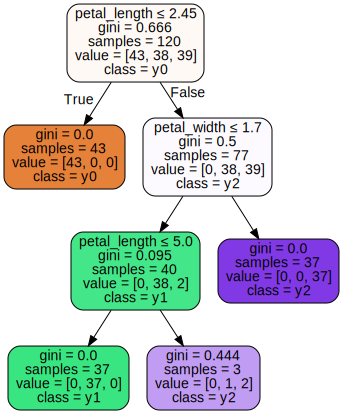

In [136]:
import graphviz
dot_data = tree.export_graphviz(decisionTreeClassifier, out_file=None, 
                         feature_names=list(irisData.columns)[:4],                         
                         class_names = True,        
                         filled=True, rounded=True,
                         proportion = False,
                         special_characters=True)  
graph = graphviz.Source(dot_data) 


# show it here
graph 

In [137]:
list(irisData.columns)[:4]

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Penguins

## Prepare Data

In [543]:
penguinsData = seaborn.load_dataset("penguins")
print(penguinsData.head())
print(penguinsData.isnull().sum())
penguinsData = penguinsData.dropna()
print(penguinsData.isnull().sum())
penguinsData =  penguinsData.sample(frac = 0.45)

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [544]:
#penguinsData['island']=penguinsData['island'].replace(to_replace=['Torgersen', 'Dream', 'Biscoe'], value=[0,1,2])
penguinsData["island"] = pd.Categorical(penguinsData["island"]).codes
penguinsData["sex"] = pd.Categorical(penguinsData["sex"]).codes
X = penguinsData.drop(['species'], axis=1)
y = penguinsData[['species']]
y = y.values[:,0]
penguinsData

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
254,Gentoo,0,49.1,14.8,220.0,5150.0,0
118,Adelie,2,35.7,17.0,189.0,3350.0,0
100,Adelie,0,35.0,17.9,192.0,3725.0,0
304,Gentoo,0,44.9,13.8,212.0,4750.0,0
152,Chinstrap,1,46.5,17.9,192.0,3500.0,0
...,...,...,...,...,...,...,...
133,Adelie,1,37.5,18.5,199.0,4475.0,1
130,Adelie,2,38.5,17.9,190.0,3325.0,0
171,Chinstrap,1,49.2,18.2,195.0,4400.0,1
25,Adelie,0,35.3,18.9,187.0,3800.0,0


In [554]:
set_prop = 0.2

#  Initialize seed parameter for the random number generator used for the split
seed = 7

# Split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=set_prop, random_state=seed)

## KNN

In [555]:
success_rate = []
for i in range(3,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    success_rate.append(accuracy_score(y_test, pred_i))
print(success_rate)
print(max(success_rate))
success_rate.index(max(success_rate))+3

[0.7555555555555555, 0.7555555555555555, 0.8, 0.7555555555555555, 0.7777777777777778, 0.7777777777777778, 0.7555555555555555, 0.7555555555555555, 0.7555555555555555, 0.7555555555555555, 0.7333333333333333, 0.8, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.8, 0.7777777777777778, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]
0.8


5

In [556]:
knn = KNeighborsClassifier(n_neighbors=success_rate.index(max(success_rate))+3)
knn.fit(X_train, y_train)
predict_y = knn.predict(X_test)
accuracy = accuracy_score(y_test, predict_y)
print(accuracy)

0.8


## Gaussian Naive Bayes

In [557]:
gaussianClassifierNB = GaussianNB()
gaussianClassifierNB.fit(X_train, y_train)
predict_y = gaussianClassifierNB.predict(X_test)
accuracy = accuracy_score(y_test, predict_y)
print(accuracy)

0.9555555555555556


In [558]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

      Adelie       1.00      0.89      0.94        18
   Chinstrap       0.78      1.00      0.88         7
      Gentoo       1.00      1.00      1.00        20

    accuracy                           0.96        45
   macro avg       0.93      0.96      0.94        45
weighted avg       0.97      0.96      0.96        45



## Multinomial Naive Bayes

In [559]:
multiClassifierNB = MultinomialNB()
multiClassifierNB.fit(X_train, y_train)
predict_y = multiClassifierNB.predict(X_test)
accuracy = accuracy_score(y_test, predict_y)
print(accuracy)


0.9111111111111111


In [560]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

      Adelie       0.89      0.89      0.89        18
   Chinstrap       0.83      0.71      0.77         7
      Gentoo       0.95      1.00      0.98        20

    accuracy                           0.91        45
   macro avg       0.89      0.87      0.88        45
weighted avg       0.91      0.91      0.91        45



## Decision Tree

In [561]:
success_rate = []
for i in range(1,40):
    params = {'max_depth': i}
    dtc = DecisionTreeClassifier(**params)
    dtc.fit(X_train,y_train)
    pred_i = dtc.predict(X_test)
    success_rate.append(accuracy_score(y_test, pred_i))
print(success_rate)
print(max(success_rate))
success_rate.index(max(success_rate))+1

[0.8444444444444444, 0.9333333333333333, 0.9777777777777777, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9555555555555556, 1.0, 1.0, 1.0, 0.9555555555555556, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 1.0, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 1.0, 1.0, 1.0, 1.0, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 1.0]
1.0


4

In [562]:
params = {'max_depth': success_rate.index(max(success_rate))+1}
decisionTreeClassifier = DecisionTreeClassifier(**params)
decisionTreeClassifier.fit(X_train, y_train)
predict_y = decisionTreeClassifier.predict(X_test)
accuracy = accuracy_score(y_test, predict_y)
print(accuracy)

0.9555555555555556


## Wine

## Load Data

In [573]:
wineRed = pd.read_csv('../data/winequality-red.csv', sep=';',na_values=['?'], low_memory=False)
wineRed['type'] = 0
wineWhite = pd.read_csv('../data/winequality-white.csv', sep=';',na_values=['?'], low_memory=False)
wineWhite['type'] = 1
wines = pd.concat([wineRed, wineWhite], ignore_index=True, sort=False)
wines.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [574]:
X = wines.drop(['type'], axis=1)
y = wines[['type']]
y = y.values[:,0]

In [582]:
set_prop = 0.2

#  Initialize seed parameter for the random number generator used for the split
seed = 7

# Split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=set_prop, random_state=seed)

## KNN

In [583]:
success_rate = []
for i in range(3,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    success_rate.append(accuracy_score(y_test, pred_i))
print(success_rate)
print(max(success_rate))
success_rate.index(max(success_rate))+3

[0.9476923076923077, 0.9415384615384615, 0.94, 0.94, 0.9415384615384615, 0.9453846153846154, 0.9484615384615385, 0.9492307692307692, 0.9453846153846154, 0.9476923076923077, 0.9446153846153846, 0.9476923076923077, 0.9446153846153846, 0.943076923076923, 0.9438461538461539, 0.9423076923076923, 0.9438461538461539, 0.943076923076923, 0.9423076923076923, 0.9407692307692308, 0.9415384615384615, 0.9423076923076923, 0.9423076923076923, 0.9438461538461539, 0.9423076923076923, 0.9407692307692308, 0.9423076923076923, 0.9423076923076923, 0.943076923076923, 0.943076923076923, 0.9438461538461539, 0.9438461538461539, 0.9438461538461539, 0.9438461538461539, 0.9438461538461539, 0.9423076923076923, 0.9415384615384615]
0.9492307692307692


10

In [584]:
knn = KNeighborsClassifier(n_neighbors=success_rate.index(max(success_rate))+3)
knn.fit(X_train, y_train)
predict_y = knn.predict(X_test)
accuracy = accuracy_score(y_test, predict_y)
print(accuracy)

0.9492307692307692


## Gaussian Naive Bayes

In [585]:
gaussianClassifierNB = GaussianNB()
gaussianClassifierNB.fit(X_train, y_train)
predict_y = gaussianClassifierNB.predict(X_test)
accuracy = accuracy_score(y_test, predict_y)
print(accuracy)

0.9807692307692307


## Multinomial Naive Bayes

In [586]:
multiClassifierNB = MultinomialNB()
multiClassifierNB.fit(X_train, y_train)
predict_y = multiClassifierNB.predict(X_test)
accuracy = accuracy_score(y_test, predict_y)
print(accuracy)

0.9292307692307692


## Decision Tree

In [587]:
success_rate = []
for i in range(1,40):
    params = {'max_depth': i}
    dtc = DecisionTreeClassifier(**params)
    dtc.fit(X_train,y_train)
    pred_i = dtc.predict(X_test)
    success_rate.append(accuracy_score(y_test, pred_i))
print(success_rate)
print(max(success_rate))
success_rate.index(max(success_rate))+1

[0.9161538461538462, 0.9661538461538461, 0.9784615384615385, 0.9869230769230769, 0.9892307692307692, 0.9923076923076923, 0.99, 0.9876923076923076, 0.9884615384615385, 0.99, 0.9884615384615385, 0.9915384615384616, 0.9930769230769231, 0.9838461538461538, 0.9892307692307692, 0.9869230769230769, 0.9907692307692307, 0.9892307692307692, 0.9876923076923076, 0.9838461538461538, 0.9853846153846154, 0.9884615384615385, 0.9846153846153847, 0.9846153846153847, 0.9846153846153847, 0.9869230769230769, 0.9884615384615385, 0.9869230769230769, 0.9907692307692307, 0.99, 0.9861538461538462, 0.9853846153846154, 0.9861538461538462, 0.9869230769230769, 0.9884615384615385, 0.9876923076923076, 0.9846153846153847, 0.9907692307692307, 0.9838461538461538]
0.9930769230769231


13

In [588]:
params = {'max_depth': success_rate.index(max(success_rate))+1}
decisionTreeClassifier = DecisionTreeClassifier(**params)
decisionTreeClassifier.fit(X_train, y_train)
predict_y = decisionTreeClassifier.predict(X_test)
accuracy = accuracy_score(y_test, predict_y)
print(accuracy)

0.9907692307692307
